In [1]:
# Import libraries
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


# Data Extraction and Cleaning

## Conflict and Population Dataset

In [2]:
os.getcwd()
os.chdir('/Users/jakobholmgren/Nod_Bootcamp/Project 4/Uncleaned Data')

In [3]:
# Import Conflict Data
conflict_data = pd.read_csv("armed_conflict_46to2020.csv")
conflict_data.sort_values(by = "location", ascending = False)

,conflict_id,location,side_a,side_a_id,side_a_2nd,side_b,side_b_id,side_b_2nd,incompatibility,territory_name,...,ep_end,ep_end_date,ep_end_prec,gwno_a,gwno_a_2nd,gwno_b,gwno_b_2nd,gwno_loc,region,version
1588,318,Zimbabwe (Rhodesia),Government of Zimbabwe (Rhodesia),101,Government of South Africa,ZANU,493,NaN,2,NaN,...,0,NaN,NaN,552,560,NaN,NaN,552,4,21.1
1587,318,Zimbabwe (Rhodesia),Government of Zimbabwe (Rhodesia),101,NaN,"ZANU, ZAPU","493, 492",NaN,2,NaN,...,0,NaN,NaN,552,NaN,NaN,NaN,552,4,21.1
1586,318,Zimbabwe (Rhodesia),Government of Zimbabwe (Rhodesia),101,NaN,"ZANU, ZAPU","493, 492",NaN,2,NaN,...,0,NaN,NaN,552,NaN,NaN,NaN,552,4,21.1
1585,318,Zimbabwe (Rhodesia),Government of Zimbabwe (Rhodesia),101,NaN,ZAPU,492,NaN,2,NaN,...,1,1968-12-31,NaN,552,NaN,NaN,NaN,552,4,21.1
1584,318,Zimbabwe (Rhodesia),Government of Zimbabwe (Rhodesia),101,NaN,ZAPU,492,NaN,2,NaN,...,0,NaN,NaN,552,NaN,NaN,NaN,552,4,21.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1782,333,Afghanistan,Government of Afghanistan,130,NaN,UIFSA,304,Government of Iran,2,NaN,...,0,NaN,NaN,700,NaN,NaN,630,700,3,21.1
1783,333,Afghanistan,Government of Afghanistan,130,NaN,Hizb-i Islami-yi Afghanistan,299,NaN,2,NaN,...,0,NaN,NaN,700,NaN,NaN,NaN,700,3,21.1
1784,333,Afghanistan,Government of Afghanistan,130,"Government of Australia, Government of Denmark...","Hizb-i Islami-yi Afghanistan, Taleban","299, 303",NaN,2,NaN,...,0,NaN,NaN,700,"900, 390, 220, 260, 325, 210, 920, 385, 290, 3...",NaN,NaN,700,3,21.1
1785,333,Afghanistan,Government of Afghanistan,130,"Government of Belgium, Government of Canada, G...",Taleban,303,NaN,2,NaN,...,0,NaN,NaN,700,"211, 20, 316, 220, 260, 325, 770, 290, 235, 36...",NaN,NaN,700,3,21.1


In [4]:
conflict_data = conflict_data[["region","year","location", "side_a"]].sort_values(by = "location",
                                                                                  ascending = False)



In [5]:
conflict_data.rename(columns={"side_a": "side_agg"}, inplace = True)

In [6]:
conflict_data.sort_values(by = "side_agg", ascending = False)
conflict_data.sort_values(by = "year", ascending = False)

,region,year,location,side_agg
2445,3,2020,Thailand,Government of Thailand
118,2,2020,Egypt,Government of Egypt
173,4,2020,Tanzania,Government of Tanzania
865,2,2020,Iraq,Government of Iraq
2037,4,2020,Burkina Faso,Government of Burkina Faso
...,...,...,...,...
299,3,1946,Vietnam (North Vietnam),Government of France
292,1,1946,Russia (Soviet Union),Government of Russia (Soviet Union)
197,2,1946,Iran,Government of Iran
189,1,1946,Greece,Government of Greece


In [9]:
# Drop "Government of "
conflict_data['side_agg'] = conflict_data['side_agg'].map(lambda x: x.lstrip('Government of '))
conflict_data

,region,year,location,side_agg
1588,4,1975,Zimbabwe (Rhodesia),Zimbabwe (Rhodesia)
1587,4,1974,Zimbabwe (Rhodesia),Zimbabwe (Rhodesia)
1586,4,1973,Zimbabwe (Rhodesia),Zimbabwe (Rhodesia)
1585,4,1968,Zimbabwe (Rhodesia),Zimbabwe (Rhodesia)
1584,4,1967,Zimbabwe (Rhodesia),Zimbabwe (Rhodesia)
...,...,...,...,...
1782,3,2001,Afghanistan,Afghanistan
1783,3,2002,Afghanistan,Afghanistan
1784,3,2003,Afghanistan,Afghanistan
1785,3,2004,Afghanistan,Afghanistan


In [10]:
# Drop everything within parentheses using regex. 

conflict_data["side_agg"] = conflict_data["side_agg"].str.replace(r"\(.*\)", "")

<ipython-input-10-355fd609e55e>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  conflict_data["side_agg"] = conflict_data["side_agg"].str.replace(r"\(.*\)", "")


In [11]:
conflict_data.sort_values(by="side_agg", ascending = False)

,region,year,location,side_agg
2333,4,1998,Guinea-Bissau,uinea-Bissau
2334,4,1999,Guinea-Bissau,uinea-Bissau
1404,4,2001,Guinea,uinea
1403,4,2000,Guinea,uinea
636,5,1970,Guatemala,uatemala
...,...,...,...,...
1800,3,2019,Afghanistan,Afghanistan
1801,3,2020,Afghanistan,Afghanistan
1789,3,2008,Afghanistan,Afghanistan
1779,3,1998,Afghanistan,Afghanistan


In [12]:
# Change Unite States of America to USA
conflict_data['side_agg'] = conflict_data['side_agg'].replace({"United States of America":"United States"})

conflict_data


,region,year,location,side_agg
1588,4,1975,Zimbabwe (Rhodesia),Zimbabwe
1587,4,1974,Zimbabwe (Rhodesia),Zimbabwe
1586,4,1973,Zimbabwe (Rhodesia),Zimbabwe
1585,4,1968,Zimbabwe (Rhodesia),Zimbabwe
1584,4,1967,Zimbabwe (Rhodesia),Zimbabwe
...,...,...,...,...
1782,3,2001,Afghanistan,Afghanistan
1783,3,2002,Afghanistan,Afghanistan
1784,3,2003,Afghanistan,Afghanistan
1785,3,2004,Afghanistan,Afghanistan


## Merging Population Data with Conflict Data

In [13]:
population_country = pd.read_csv("Population_bycountry.csv")
# Rename "time" column to simplify merge.
population_country=population_country.rename(columns = {"time":"year", "name":"side_agg"})
population_country

,geo,side_agg,year,population
0,afg,Afghanistan,1800,3280000
1,afg,Afghanistan,1801,3280000
2,afg,Afghanistan,1802,3280000
3,afg,Afghanistan,1803,3280000
4,afg,Afghanistan,1804,3280000
...,...,...,...,...
59292,ssd,South Sudan,2096,41885468
59293,ssd,South Sudan,2097,42121818
59294,ssd,South Sudan,2098,42352021
59295,ssd,South Sudan,2099,42576186


In [14]:
# Merge population and conflict data. 

pop_conf = conflict_data.merge(population_country, on = ["year", "side_agg"])
pop_conf

,region,year,location,side_agg,geo,population
0,3,1953,Vietnam (North Vietnam),France,fra,42724223
1,4,1953,Tunisia,France,fra,42724223
2,4,1953,Morocco,France,fra,42724223
3,3,1953,Laos,France,fra,42724223
4,3,1953,Cambodia (Kampuchea),France,fra,42724223
...,...,...,...,...,...,...
1933,3,2000,Afghanistan,Afghanistan,afg,20093756
1934,3,2002,Afghanistan,Afghanistan,afg,21979923
1935,3,2003,Afghanistan,Afghanistan,afg,23064851
1936,3,2004,Afghanistan,Afghanistan,afg,24118979


## Number of Conflicts Globally

In [15]:
conflicts_yearly = pop_conf.groupby(["year"]).count()
conflicts_yearly["no_conflicts"] = conflicts_yearly["region"]
conflicts_yearly

,region,location,side_agg,geo,population,no_conflicts
year,,,,,,
1946,12,12,12,12,12,12
1947,9,9,9,9,9,9
1948,10,10,10,10,10,10
1949,11,11,11,11,11,11
1950,12,12,12,12,12,12
...,...,...,...,...,...,...
2016,48,48,48,48,48,48
2017,42,42,42,42,42,42
2018,46,46,46,46,46,46


In [17]:
conflicts_yearly_aggregat = conflicts_yearly.reset_index()
conflicts_yearly_aggregat["year"]=pd.to_datetime(conflicts_yearly_aggregat.year, format ="%Y")


In [120]:
# Export as .csv

conflicts_yearly_aggregat.to_csv(r'/Users/jakobholmgren/Nod_Bootcamp/Project 4 - Population and Conflict\conflicts_agg_year.csv', index = False)

In [18]:
conflicts_yearly_aggregat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   year          75 non-null     datetime64[ns]
 1   region        75 non-null     int64         
 2   location      75 non-null     int64         
 3   side_agg      75 non-null     int64         
 4   geo           75 non-null     int64         
 5   population    75 non-null     int64         
 6   no_conflicts  75 non-null     int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 4.2 KB


In [19]:
conflict_data['region_name'] = conflict_data['region'].map({"1":"Europe",
                                                                      "2":"Middle East",
                                                                      "3":"Asia",
                                                                     "4":"Africa",
                                                                     "5":"Americas"})
conflict_data

,region,year,location,side_agg,region_name
1588,4,1975,Zimbabwe (Rhodesia),Zimbabwe,Africa
1587,4,1974,Zimbabwe (Rhodesia),Zimbabwe,Africa
1586,4,1973,Zimbabwe (Rhodesia),Zimbabwe,Africa
1585,4,1968,Zimbabwe (Rhodesia),Zimbabwe,Africa
1584,4,1967,Zimbabwe (Rhodesia),Zimbabwe,Africa
...,...,...,...,...,...
1782,3,2001,Afghanistan,Afghanistan,Asia
1783,3,2002,Afghanistan,Afghanistan,Asia
1784,3,2003,Afghanistan,Afghanistan,Asia
1785,3,2004,Afghanistan,Afghanistan,Asia


## Visualization

Text(0, 0.5, 'No. Conflicts')

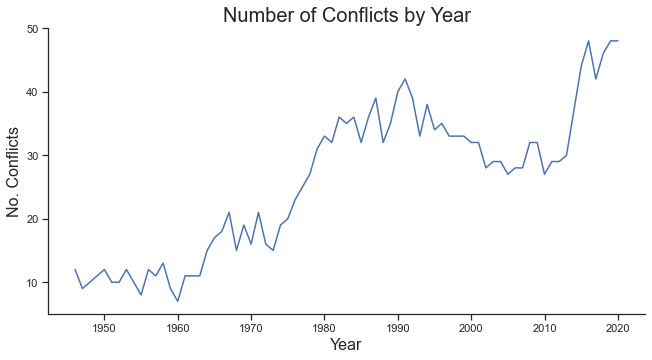

In [20]:
# Plot over yearly conflict count. 
sns.set(rc={'figure.figsize':(10.7,5.27)})

sns.set_style("ticks")
sns.lineplot(data = conflicts_yearly, x = "year", y = "no_conflicts", color='b')
sns.despine(top=True)

# Add titles

plt.title("Number of Conflicts by Year", fontsize = 20, )
plt.xlabel("Year", fontsize = 16)
plt.ylabel("No. Conflicts", fontsize = 16)


## Conflicts per Region

In [21]:
conflicts_yearly_by_region = conflict_data.groupby(["year", "region_name"]).location.count().unstack()
conflicts_yearly_by_region

region_name,Africa,Americas,Asia,Europe,Middle East
year,,,,,
1946,NaN,1.0,6.0,6.0,3.0
1947,1.0,1.0,8.0,4.0,NaN
1948,NaN,1.0,13.0,4.0,2.0
1949,NaN,1.0,15.0,2.0,2.0
1950,NaN,1.0,15.0,1.0,1.0
...,...,...,...,...,...
2016,22.0,2.0,16.0,3.0,11.0
2017,19.0,1.0,17.0,3.0,11.0
2018,21.0,1.0,16.0,2.0,12.0


In [22]:
conflict_by_region = pd.crosstab(conflict_data.year, conflict_data.region_name)

In [23]:
conflict_by_region.columns

Index(['Africa', 'Americas', 'Asia', 'Europe', 'Middle East'], dtype='object', name='region_name')

In [24]:
conflict_by_region

region_name,Africa,Americas,Asia,Europe,Middle East
year,,,,,
1946,0,1,6,6,3
1947,1,1,8,4,0
1948,0,1,13,4,2
1949,0,1,15,2,2
1950,0,1,15,1,1
...,...,...,...,...,...
2016,22,2,16,3,11
2017,19,1,17,3,11
2018,21,1,16,2,12


In [25]:
conflict_by_region_aggregat = conflict_by_region.reset_index()

conflict_by_region_aggregat["year"]=pd.to_datetime(conflict_by_region_aggregat.year, format ="%Y")
conflict_by_region_aggregat

region_name,year,Africa,Americas,Asia,Europe,Middle East
0,1946-01-01,0,1,6,6,3
1,1947-01-01,1,1,8,4,0
2,1948-01-01,0,1,13,4,2
3,1949-01-01,0,1,15,2,2
4,1950-01-01,0,1,15,1,1
...,...,...,...,...,...,...
70,2016-01-01,22,2,16,3,11
71,2017-01-01,19,1,17,3,11
72,2018-01-01,21,1,16,2,12
73,2019-01-01,26,2,15,2,10


In [125]:
# Save as .csv file

conflict_by_region_aggregat.to_csv(r'/Users/jakobholmgren/Nod_Bootcamp/Project 4 - Population and Conflict\Conflict_by_region_agg.csv', index = False)

conflict_by_region_aggregat

region_name,year,Africa,Americas,Asia,Europe,Middle East
0,1946-01-01,0,1,6,6,3
1,1947-01-01,1,1,8,4,0
2,1948-01-01,0,1,13,4,2
3,1949-01-01,0,1,15,2,2
4,1950-01-01,0,1,15,1,1
5,1951-01-01,0,0,12,0,1
6,1952-01-01,1,1,10,0,1
7,1953-01-01,3,1,11,0,1
8,1954-01-01,4,2,8,0,1
9,1955-01-01,4,1,6,1,1


## Visualization Per Region

Text(0.5, 1.0, 'Stacked Plot of Conflicts by Region')

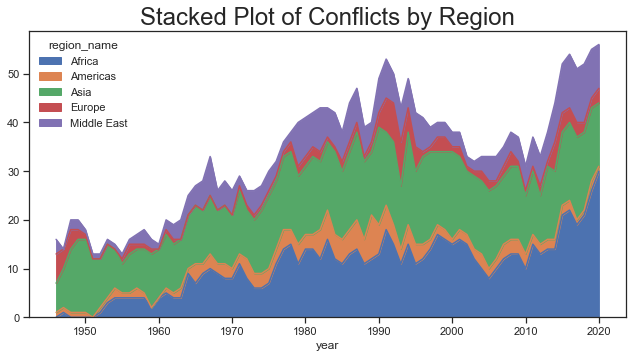

In [26]:
# Stacked plot over conflicts divided by region
plt.style.use("seaborn-ticks")

conflict_by_region.plot(kind = "area")



plt.title("Stacked Plot of Conflicts by Region", fontsize = 24)

# Adding Population Growth Parameter Using 5 Year Lag

In [580]:
## We want to add a 5- and 20 year lag the the population parameter
## to calculate average growth. To do this we use original population
## data sample. And shift 5-years.


## Five year lag.

In [27]:
# Calculate 5-year lag. 
pop_shift_5 = population_country.groupby(["side_agg", "year"]).mean().shift(5)
# Merge into conflict data. 
master = conflict_data.merge(pop_shift_5, on = ["year", "side_agg"])
# Clean up data
master.rename(columns = {"population": "population_5_yr_lag"})
master = master.drop(labels=["region", "location"], axis=1)
# Adjust for duplicates
master = master.drop_duplicates().sort_values(by = "side_agg")

In [28]:
# Merge with true population numbers: 

conflict_data_wlag = master.merge(pop_conf, on = ["year", "side_agg"])

# Clean data
conflict_data_wlag = conflict_data_wlag.drop(labels=["location","geo"], axis=1)
conflict_data_wlag = conflict_data_wlag.rename(columns = {"population_x": "population_5y_lag",
                                                          "population_y":"population"})

#
conflict_data_wlag

,year,side_agg,region_name,population_5y_lag,region,population
0,1990,Afghanistan,Asia,11783050.0,3,12249114
1,1998,Afghanistan,Asia,15095099.0,3,18863999
2,2008,Afghanistan,Asia,23064851.0,3,27294031
3,2018,Afghanistan,Asia,31731688.0,3,36373176
4,2018,Afghanistan,Asia,31731688.0,3,36373176
...,...,...,...,...,...,...
1984,1999,Uzbekistan,Asia,22407158.0,3,24489769
1985,2004,Uzbekistan,Asia,24489769.0,3,26160326
1986,1962,Venezuela,Americas,7285973.0,5,8790589
1987,1982,Venezuela,Americas,14127787.0,5,16185894


In [29]:
a = conflict_data_wlag["population"]
b = conflict_data_wlag["population_5y_lag"]

In [30]:
# Create variable for 5-year cumulative avg growth rate.
conflict_data_wlag["compunded_annual_growth_pct"] = (((a/b)**(1/5))-1)*100
#conflict_data_wlag["compunded_avg_growth_pct"] = conflict_data_wlag["compunded_annual_growth_pct"]
conflict_data_wlag

,year,side_agg,region_name,population_5y_lag,region,population,compunded_annual_growth_pct
0,1990,Afghanistan,Asia,11783050.0,3,12249114,0.778848
1,1998,Afghanistan,Asia,15095099.0,3,18863999,4.558552
2,2008,Afghanistan,Asia,23064851.0,3,27294031,3.424494
3,2018,Afghanistan,Asia,31731688.0,3,36373176,2.767930
4,2018,Afghanistan,Asia,31731688.0,3,36373176,2.767930
...,...,...,...,...,...,...,...
1984,1999,Uzbekistan,Asia,22407158.0,3,24489769,1.793391
1985,2004,Uzbekistan,Asia,24489769.0,3,26160326,1.328518
1986,1962,Venezuela,Americas,7285973.0,5,8790589,3.825991
1987,1982,Venezuela,Americas,14127787.0,5,16185894,2.757259


In [31]:
# Control Check 1st row
c = 11783050
d = 12249114
e = 1.0077884
(c * (e**5))

12249108.918682173

## 20 year lag.

In [1]:
# Calculate 20-year lag. 
pop_shift_20 = population_country.groupby(["side_agg", "year"]).mean().shift(20)
#pop_shift_20
# Merge into conflict data. 
master = conflict_data_wlag.merge(pop_shift_20, on = ["year", "side_agg"])
# Clean up data
master = master.rename(columns = {"population_y": "population_20yr_lag",
                         "population_x":"population",
                         "compunded_annual_growth_pct":"5yr_annual_growth_pct"})

#Adjust for duplicates
master = master.drop_duplicates().sort_values(by = "side_agg")


NameError: name 'population_country' is not defined

In [33]:
a = master["population"]
b = master["population_20yr_lag"]

# Create variable for 5-year cumulative avg growth rate.
master["20yr_annual_growth_pct"] = (((a/b)**(1/20))-1)*100


In [34]:
master['region_name'] = master['region'].map({"1":"Europe",
                                                                      "2":"Middle East",
                                                                      "3":"Asia",
                                                                     "4":"Africa",
                                                                     "5":"Americas"})

<AxesSubplot:xlabel='5yr_annual_growth_pct', ylabel='Count'>

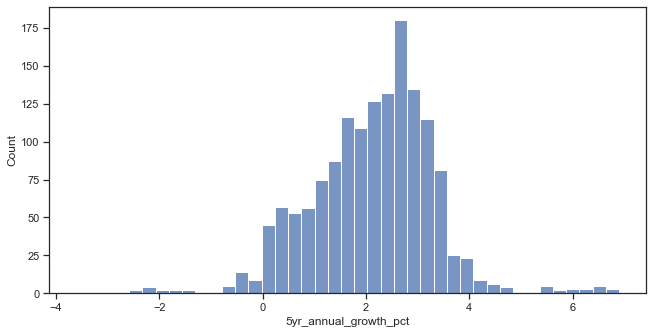

In [35]:
sns.histplot(master["5yr_annual_growth_pct"])

/Users/jakobholmgren/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='5yr_annual_growth_pct'>

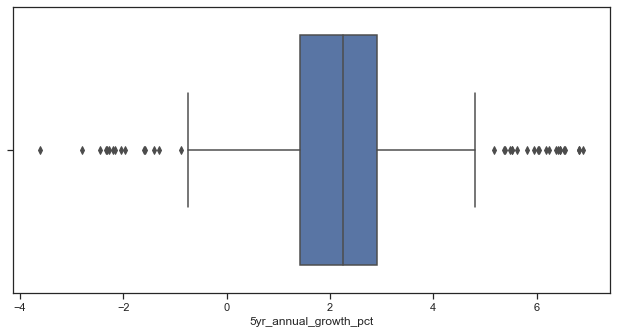

In [36]:
sns.boxplot(master["5yr_annual_growth_pct"])

In [133]:
os.getcwd()



'/Users/jakobholmgren/Nod_Bootcamp/Project 4/Uncleaned Data'

In [134]:
# Save as .csv file

master.to_csv(r'/Users/jakobholmgren/Nod_Bootcamp/Project 4 - Population and Conflict\Sample_data.csv',
              index = False)

# Total Population Dataset

## Population by Region

In [37]:
# Change Directory
os.chdir('/Users/jakobholmgren/Nod_Bootcamp/Project 4/Uncleaned Data')

# By Region


population_by_region = pd.read_csv("Gapminder_pop_region.csv")

In [38]:
# Drop column
population_by_region.drop(columns = "geo")

,name,time,Population
0,Africa,1800,81209567
1,Africa,1801,81313551
2,Africa,1802,81418900
3,Africa,1803,81525621
4,Africa,1804,81633731
...,...,...,...
1199,The Americas,2096,1175108780
1200,The Americas,2097,1173179186
1201,The Americas,2098,1171247479
1202,The Americas,2099,1169317465


In [39]:
mask = population_by_region.time.between(1946,2020)

population_by_region = population_by_region.loc[mask]

In [41]:
agg_pop = population_by_region.groupby(["time"]).sum()

In [42]:
## Pivot table
population_by_region = pd.crosstab(population_by_region.time,
                                   population_by_region.name,
                                   values = population_by_region.Population,
                                   aggfunc = "sum")




In [43]:
population_by_region=population_by_region.reset_index()

# Export Cleaned Data
population_by_region.to_csv(r'/Users/jakobholmgren/Nod_Bootcamp/Project 4 - Population and Conflict\tot_population_by_region.csv')



## Visualization by Region

Text(0.5, 1.0, 'Stacked Plot of Population by Region')

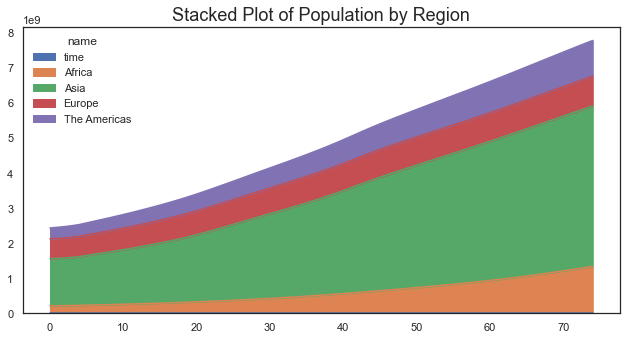

In [44]:
sns.set(rc={'figure.figsize':(10.7,5.27)})
plt.style.use("seaborn-ticks")

population_by_region.plot(kind = "area")

plt.title("Stacked Plot of Population by Region", fontsize = 18)

Text(0, 0.5, 'Population')

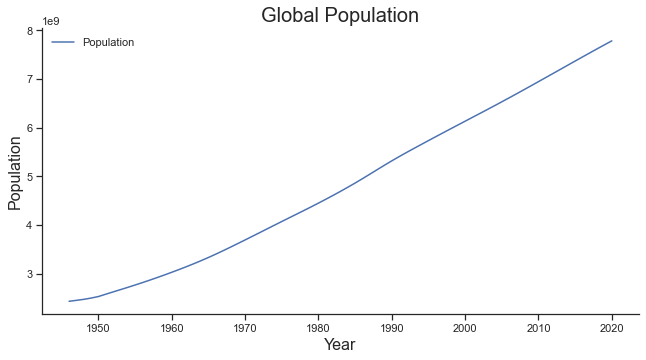

In [45]:
# Plot over yearly conflict count. 
sns.set(rc={'figure.figsize':(10.7,5.27)})
# Note to self: make table cooler.
sns.set_style("ticks")
sns.lineplot(data = agg_pop, color='b')
sns.despine(top=True)

# Add titles

plt.title("Global Population", fontsize = 20, )
plt.xlabel("Year", fontsize = 16)
plt.ylabel("Population", fontsize = 16)

Text(0, 0.5, 'Population')

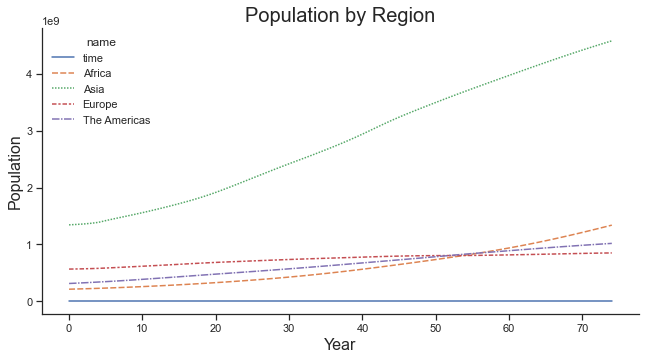

In [46]:
# Plot over yearly conflict count. 
sns.set(rc={'figure.figsize':(10.7,5.27)})
# Note to self: make table cooler.
sns.set_style("ticks")
sns.lineplot(data = population_by_region, color='b')
sns.despine(top=True)

# Add titles

plt.title("Population by Region", fontsize = 20, )
plt.xlabel("Year", fontsize = 16)
plt.ylabel("Population", fontsize = 16)

## Population by Country

In [144]:
# By Country
# Specify Directory
os.chdir("/Users/jakobholmgren/Nod_Bootcamp/Project 4/Uncleaned Data")

In [47]:
population_by_country = pd.read_csv("Population_bycountry.csv")

In [48]:
# Calculate 5-year lag. 
pop_shift_5 = population_by_country.groupby(["name", "time"]).mean().shift(5)
pop_shift_5

# Merge with population_by_country

# Merge into conflict data. 
population_by_country = population_by_country.merge(pop_shift_5, on = ["name", "time"])

# Calculate 20-year lag. 
pop_shift_20 = population_by_country.groupby(["name", "time"]).mean().shift(20)
pop_shift_20

# Merge into conflict data. 
population_by_country = population_by_country.merge(pop_shift_20, on = ["name", "time"])


,geo,name,time,population_x_x,population_y_x,population_x_y,population_y_y
0,afg,Afghanistan,1800,3280000,NaN,NaN,NaN
1,afg,Afghanistan,1801,3280000,NaN,NaN,NaN
2,afg,Afghanistan,1802,3280000,NaN,NaN,NaN
3,afg,Afghanistan,1803,3280000,NaN,NaN,NaN
4,afg,Afghanistan,1804,3280000,NaN,NaN,NaN
...,...,...,...,...,...,...,...
59292,ssd,South Sudan,2096,41885468,40609074.0,35849687.0,33997062.0
59293,ssd,South Sudan,2097,42121818,40877110.0,36206378.0,34376340.0
59294,ssd,South Sudan,2098,42352021,41138744.0,36558096.0,34751362.0
59295,ssd,South Sudan,2099,42576186,41393996.0,36904653.0,35122026.0


In [49]:
# Drop columns
population_by_country.drop(columns = ["geo", "population_y_y"], inplace = True)
population_by_country = population_by_country.rename(columns = {"population_x_x":"Population",
                              "time":"year",
                              "name":"country",
                              "population_y_x":"Population_5yr_lag",
                             "population_x_y":"Population_20yr_lag"})

In [50]:
mask = population_by_country.year.between(1946,2020)

population_by_country = population_by_country.loc[mask]

In [51]:
# Annual Growth 5 - year

a = population_by_country["Population"]
b = population_by_country["Population_5yr_lag"]

# Create variable for 5-year cumulative avg growth rate.
population_by_country["5yr_annual_growth_pct"] = (((a/b)**(1/20))-1)*100

In [52]:
# Annual Growth 20 - year

c = population_by_country["Population"]
d = population_by_country["Population_20yr_lag"]

# Create variable for 5-year cumulative avg growth rate.
population_by_country["20yr_annual_growth_pct"] = (((c/d)**(1/20))-1)*100

In [152]:
# Export Cleaned Data

conflict_by_region.reset_index()
population_by_country.to_csv(r'/Users/jakobholmgren/Nod_Bootcamp/Project 4 - Population and Conflict\File Name.csv'
                             ,index = False)



## Population by Country Diagnostic Visualization

In [53]:
count = population_by_country["5yr_annual_growth_pct"].count()
print(count)

14775


<AxesSubplot:xlabel='5yr_annual_growth_pct', ylabel='Count'>

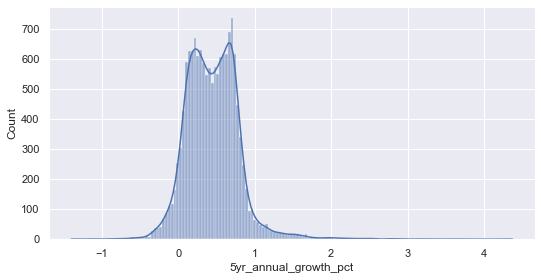

In [56]:
plt.style.use("seaborn-ticks")


sns.set(rc={'figure.figsize':(8.7,4.27)})
sns.histplot(data=population_by_country, x="5yr_annual_growth_pct", kde = True)

<AxesSubplot:xlabel='20yr_annual_growth_pct', ylabel='Count'>

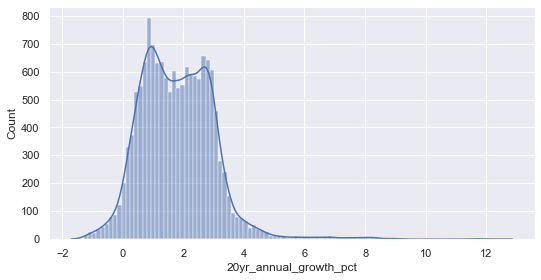

In [57]:
plt.style.use("seaborn-ticks")


sns.set(rc={'figure.figsize':(8.7,4.27)})
sns.histplot(data=population_by_country, x="20yr_annual_growth_pct", kde=True)

In [58]:
population_by_country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14775 entries, 146 to 59216
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 14775 non-null  object 
 1   year                    14775 non-null  int64  
 2   Population              14775 non-null  int64  
 3   Population_5yr_lag      14775 non-null  float64
 4   Population_20yr_lag     14775 non-null  float64
 5   5yr_annual_growth_pct   14775 non-null  float64
 6   20yr_annual_growth_pct  14775 non-null  float64
dtypes: float64(4), int64(2), object(1)
memory usage: 923.4+ KB


In [59]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1988
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    1500 non-null   int64  
 1   side_agg                1500 non-null   object 
 2   region_name             1483 non-null   object 
 3   population_5y_lag       1500 non-null   float64
 4   region                  1500 non-null   object 
 5   population              1500 non-null   int64  
 6   5yr_annual_growth_pct   1500 non-null   float64
 7   population_20yr_lag     1500 non-null   float64
 8   20yr_annual_growth_pct  1500 non-null   float64
dtypes: float64(4), int64(2), object(3)
memory usage: 117.2+ KB


# Hypothesis Testing Sample vs. Population

In [60]:
import scipy.stats as stats

In [61]:
#population_by_country

,country,year,Population,Population_5yr_lag,Population_20yr_lag,5yr_annual_growth_pct,20yr_annual_growth_pct
146,Afghanistan,1946,7447856,7101412.0,6155808.0,0.238447,0.957203
147,Afghanistan,1947,7519147,7169387.0,6214731.0,0.238447,0.957203
148,Afghanistan,1948,7591120,7238012.0,6274219.0,0.238447,0.957203
149,Afghanistan,1949,7663783,7307295.0,6334276.0,0.238447,0.957203
150,Afghanistan,1950,7752118,7377241.0,6394908.0,0.248139,0.966965
...,...,...,...,...,...,...,...
59212,South Sudan,2016,12230730,10448857.0,5591114.0,0.790403,3.991466
59213,South Sudan,2017,12575714,10818258.0,5814006.0,0.755501,3.932855
59214,South Sudan,2018,12919053,11177490.0,6099923.0,0.726634,3.823417
59215,South Sudan,2019,13263184,11530971.0,6405864.0,0.702232,3.705909


In [62]:
# T-test on 5 year annual population growth

stats.ttest_ind(master["5yr_annual_growth_pct"],population_by_country["5yr_annual_growth_pct"],
                alternative = "greater")

Ttest_indResult(statistic=122.76821693104212, pvalue=0.0)

In [63]:
stats.ttest_ind(master["20yr_annual_growth_pct"],population_by_country["5yr_annual_growth_pct"],
                alternative = "greater")

Ttest_indResult(statistic=143.50343029831777, pvalue=0.0)

## Box Plots

<AxesSubplot:xlabel='5yr_annual_growth_pct'>

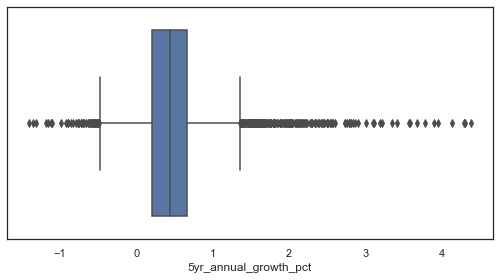

In [64]:
plt.style.use("seaborn-ticks")


sns.boxplot(data=population_by_country, x="5yr_annual_growth_pct")
#sns.scatterplot(data=mean5yr_population_by_country, x="5yr_annual_growth_pct")
#sns.swarmplot(data=population_by_country, x= "5yr_annual_growth_pct", color = "yellow")



,year,side_agg,region_name,population_5y_lag,region,population,5yr_annual_growth_pct,population_20yr_lag,20yr_annual_growth_pct
0,1990,Afghanistan,Asia,1.178305e+07,3,12249114,0.778848,1.112612e+07,0.481947
1,1998,Afghanistan,Asia,1.509510e+07,3,18863999,4.558552,1.323773e+07,1.786693
2,2008,Afghanistan,Asia,2.306485e+07,3,27294031,3.424494,1.154089e+07,4.397818
3,2018,Afghanistan,Asia,3.173169e+07,3,36373176,2.767930,1.886400e+07,3.337363
4,2018,Afghanistan,Asia,3.173169e+07,3,36373176,2.767930,1.886400e+07,3.337363
5,2017,Afghanistan,Asia,3.069696e+07,3,35530081,2.967501,1.838160e+07,3.350037
6,2017,Afghanistan,Asia,3.069696e+07,3,35530081,2.967501,1.838160e+07,3.350037
7,2015,Afghanistan,Asia,2.880317e+07,3,33736494,3.212415,1.709954e+07,3.456022
8,2015,Afghanistan,Asia,2.880317e+07,3,33736494,3.212415,1.709954e+07,3.456022
9,2014,Afghanistan,Asia,2.800433e+07,3,32758020,3.185456,1.617272e+07,3.592122


<AxesSubplot:xlabel='5yr_annual_growth_pct', ylabel='Count'>

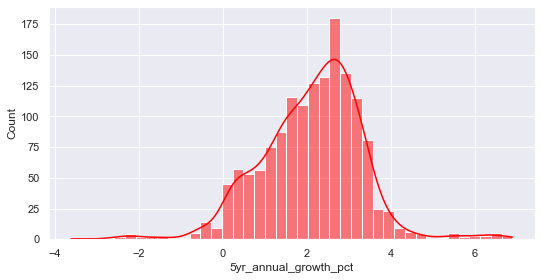

In [65]:
plt.style.use("seaborn-ticks")


sns.set(rc={'figure.figsize':(8.7,4.27)})
sns.histplot(data=master, x="5yr_annual_growth_pct", color = "red", kde = True)

<AxesSubplot:xlabel='20yr_annual_growth_pct', ylabel='Count'>

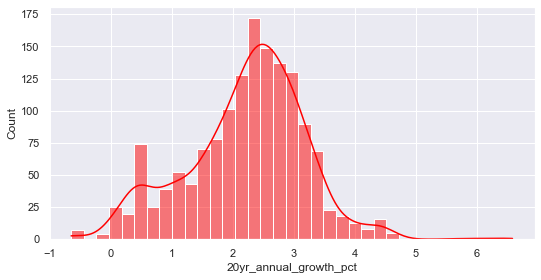

In [67]:
plt.style.use("seaborn-ticks")


sns.set(rc={'figure.figsize':(8.7,4.27)})
sns.histplot(data=master, x="20yr_annual_growth_pct", color = "red", kde = True)

/Users/jakobholmgren/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='5yr_annual_growth_pct'>

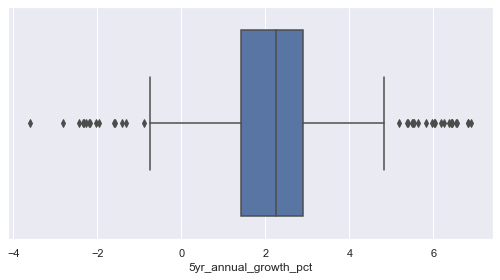

In [68]:
sns.boxplot(master["5yr_annual_growth_pct"])

<AxesSubplot:xlabel='5yr_annual_growth_pct', ylabel='Count'>

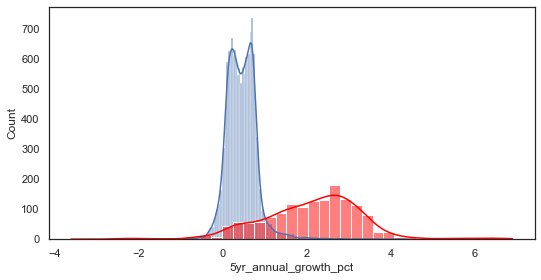

In [69]:
## Comparing distributions 5yr_annual 
plt.style.use("seaborn-ticks")
sns.histplot(population_by_country["5yr_annual_growth_pct"], kde = True)
sns.histplot(master["5yr_annual_growth_pct"], color = "red", kde = True)

<AxesSubplot:xlabel='20yr_annual_growth_pct', ylabel='Count'>

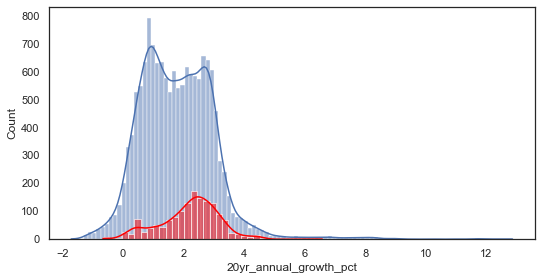

In [110]:
## Comparing distributions 5yr_annual 
plt.style.use("seaborn-ticks")
sns.histplot(population_by_country["20yr_annual_growth_pct"], kde = True)
sns.histplot(master["20yr_annual_growth_pct"], color = "red", kde = True)

## Bootstrapping

In [86]:
# Bootstrapping, resampling

experiment_boot = []

for i in range(10000):
    
    boot = population_by_country["5yr_annual_growth_pct"].sample(30, replace=True).mean() # Resampling 
    
    experiment_boot.append(boot)

# Extracts 10000 different means -> CLT -> Normally distributed means

<AxesSubplot:ylabel='Count'>

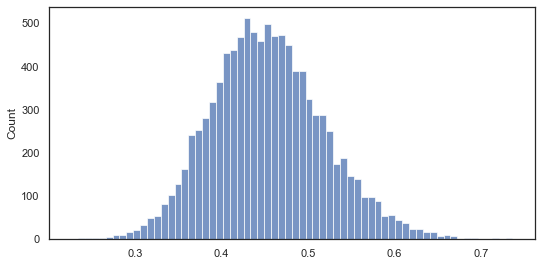

In [87]:
sns.histplot(experiment_boot)

In [88]:
# Bootstrapping, resampling

a_boot = []

for i in range(10000):
    
    boot = master["5yr_annual_growth_pct"].sample(30, replace=True).mean() # Resampling 
    
    a_boot.append(boot)



<AxesSubplot:ylabel='Count'>

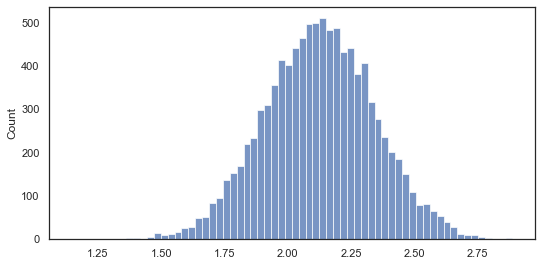

In [89]:
sns.histplot(a_boot)

<AxesSubplot:ylabel='Count'>

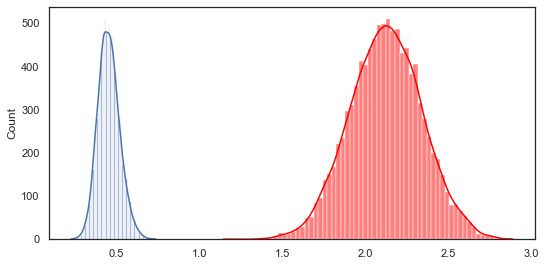

In [90]:
plt.style.use("seaborn-ticks")
sns.histplot(experiment_boot, kde = True)
sns.histplot(a_boot, color = "red", kde = True)

<AxesSubplot:>

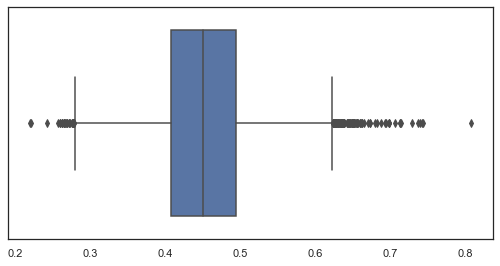

In [76]:
sns.boxplot(x = experiment_boot)

In [92]:
# T-test on the bootstrapped data
stats.ttest_ind(a_boot,
                experiment_boot, alternative = "greater")

Ttest_indResult(statistic=735.5555976696514, pvalue=0.0)

In [108]:
# T-test on original data 5 yr
stats.ttest_ind(master["5yr_annual_growth_pct"],
                population_by_country["5yr_annual_growth_pct"],
                alternative = "greater")


Ttest_indResult(statistic=122.76821693104212, pvalue=0.0)

In [109]:
# T-test on original data 20 yr
stats.ttest_ind(master["20yr_annual_growth_pct"],
                population_by_country["20yr_annual_growth_pct"],
               alternative = "greater")

Ttest_indResult(statistic=12.394178074288911, pvalue=2.023903254740289e-35)

In [81]:
# Repeat for 20 year: 

# Bootstrapping, resampling

a_boot1 = []

for i in range(10000):
    
    boot = master["20yr_annual_growth_pct"].sample(30, replace=True).mean() # Resampling 
    
    a_boot1.append(boot)
    

experiment_boot1 = []

for i in range(10000):
    
    boot = population_by_country["20yr_annual_growth_pct"].sample(30, replace=True).mean() # Resampling 
    
    experiment_boot1.append(boot)

<AxesSubplot:ylabel='Count'>

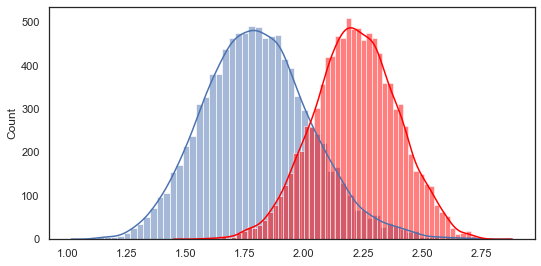

In [97]:
plt.style.use("seaborn-ticks")
sns.histplot(experiment_boot1, kde = True)
sns.histplot(a_boot1, color = "red", kde = True)

In [104]:
stats.ttest_ind(a_boot, experiment_boot
                , alternative = "greater")

Ttest_indResult(statistic=735.5555976696514, pvalue=0.0)

In [105]:
stats.ttest_ind(a_boot1, experiment_boot1
                , alternative = "greater")

Ttest_indResult(statistic=142.53152784263878, pvalue=0.0)